In [ ]:
# Starting with static visualizations

import pandas as pd
import yfinance as yf
import uuid
import random
from enum import Enum

def get_signals(symbol, s, e):
    ticker = yf.Ticker(symbol)
    data = ticker.history(start=s, end=e)
    data.index = data.index.tz_localize(None)
    return data

def random_number():
    return random.randint(5,20)

from backtesting_engine.trading_strategies.moving_average_crossover import MovingAverageCrossoverStrategy

mavg_strategy = MovingAverageCrossoverStrategy(short_window=40, long_window=100)

# stocks = ["AAPL", "MSFT", "NVDA"]
stocks = ["AAPL", "MSFT"]

start = "2020-01-01"
end = "2024-01-01"
signals_dict = {}

for stock in stocks:
    signals_dict[stock] = mavg_strategy.generate_signals(get_signals(stock, start, end))

backtest_timeframe = signals_dict[stocks[0]].index

class Book:
    def __init__(self, starting_cash):
        self.cash = starting_cash
        self.positions = {}
        self.positions_value = 0
        self.positions_value_history = [self.positions_value]
        self.nav = self.cash + self.positions_value
        self.nav_history = [self.nav]
        
        self.trade_history = pd.DataFrame(columns=["trade_id", "symbol", "direction", "quantity", "price", "amount", "date"]).set_index("trade_id")
        self.cash_history = [self.cash]

class Position:
    def __init__(self, symbol, quantity, price):
        self.symbol = symbol
        self.quantity = quantity
        self.average_price = price

class Signal(Enum):
    BUY = 1.0
    SELL = -1.0

starting_cash = 10000

book = Book(starting_cash)

def trade_log_generator(symbol, direction, quantity, price, date):
    return {
        "trade_id": str(uuid.uuid4()),
        "symbol": symbol,
        "direction": direction,
        "quantity": quantity,
        "price": price,
        "amount": quantity * price,
        "date": date
    }

quantity = 10

for i in range(len(backtest_timeframe)):
    #eod_position_values = []
    for symbol, signals in signals_dict.items():
        signal = signals['positions'].iloc[i]
        price = signals['price'].iloc[i]
        date = signals.index[i]

        if signal == Signal.BUY.value:
  
            trade_log = trade_log_generator(symbol, "BUY", quantity, price, date) # we might not need this

            book.cash -= trade_log["amount"]

            if symbol in book.positions.keys():
                position = book.positions[symbol]
                prev_quantity = position.quantity
                prev_price = position.average_price

                position.quantity += quantity # position.quantity = new quantity

                position.average_price = ((prev_price * prev_quantity) + (price * quantity)) / position.quantity
            else:
                position = Position(symbol=symbol, quantity=quantity, price=price)

            book.positions[symbol] = position

            trade_df = pd.DataFrame([trade_log]).set_index("trade_id")
            book.trade_history = pd.concat([book.trade_history, trade_df], axis=0)

        elif signal == Signal.SELL.value:
            trade_log = trade_log_generator(symbol, "SELL", quantity, price, date) # at the moment feels quite redudant - actually used to update
            quantity_owned = book.positions[symbol].quantity

            if quantity == quantity_owned:
                del book.positions[symbol]
            else:
                position = book.positions[symbol]
                position.quantity -= quantity

            book.cash += trade_log["amount"] # will update so we use getters/setters to handle these operations

            trade_df = pd.DataFrame([trade_log]).set_index("trade_id")
            book.trade_history = pd.concat([book.trade_history, trade_df], axis=0)

        #eod_position_values.append()

    book.cash_history.append(book.cash)

    # we have a current position open
    
    # price is the market_price of share at said time-step

    total_positions_value = sum((pos.quantity * price) for pos in book.positions.values()) # find a way to do this part better - like a way to not have to recalculate
    # also have a method for the Position class which computes value using the pos.quantity and pos.average_price

    book.positions_value = total_positions_value
    book.positions_value_history.append(total_positions_value)

    book.nav = book.positions_value + book.cash
    book.nav_history.append(book.nav)

    print(book.positions)
    print("POS", book.positions_value, "CASH", book.cash)


{}
POS 0 CASH 10000
{}
POS 0 CASH 10000
{}
POS 0 CASH 10000
{}
POS 0 CASH 10000
{'AAPL': <__main__.Position object at 0x000001202F6E63D0>}
POS 1754.8838806152344 CASH 9216.823196411133
{'AAPL': <__main__.Position object at 0x000001202F6E63D0>}
POS 1774.8484802246094 CASH 9216.823196411133
{'AAPL': <__main__.Position object at 0x000001202F6E63D0>}
POS 1779.1682434082031 CASH 9216.823196411133
{'AAPL': <__main__.Position object at 0x000001202F6E63D0>}
POS 1755.7473754882812 CASH 9216.823196411133
{'AAPL': <__main__.Position object at 0x000001202F6E63D0>}
POS 1796.8289184570312 CASH 9216.823196411133
{'AAPL': <__main__.Position object at 0x000001202F6E63D0>}
POS 1807.9627990722656 CASH 9216.823196411133
{'AAPL': <__main__.Position object at 0x000001202F6E63D0>}
POS 1821.7849731445312 CASH 9216.823196411133
{'AAPL': <__main__.Position object at 0x000001202F6E63D0>}
POS 1889.3582153320312 CASH 9216.823196411133
{'AAPL': <__main__.Position object at 0x000001202F6E63D0>}
POS 1787.902374267578

In [2]:
import yfinance as yf

def get_data(symbol, s, e):
    ticker = yf.Ticker(symbol)
    data = ticker.history(start=s, end=e)
    data.index = data.index.tz_localize(None)
    return data

get_data("BTC-USD", "2020-01-01", "2021-01-01")

$BTC-USD: possibly delisted; no price data found  (1d 2020-01-01 -> 2021-01-01)


AttributeError: 'Index' object has no attribute 'tz_localize'

In [4]:
# Starting with static visualizations

import pandas as pd
import yfinance as yf
import uuid
import random
from enum import Enum

def get_signals(symbol, s, e):
    ticker = yf.Ticker(symbol)
    data = ticker.history(start=s, end=e)
    data.index = data.index.tz_localize(None)
    return data

def random_number():
    return random.randint(5,20)

from backtesting_engine.trading_strategies.moving_average_crossover import MovingAverageCrossoverStrategy

mavg_strategy = MovingAverageCrossoverStrategy(short_window=40, long_window=100)

stocks = ["AAPL", "MSFT", "NVDA"]

start = "2020-01-01"
end = "2024-01-01"
signals_dict = {}

for stock in stocks:
    signals_dict[stock] = mavg_strategy.generate_signals(get_signals(stock, start, end))

backtest_timeframe = signals_dict[stocks[0]].index

class Book:
    def __init__(self, starting_cash):
        self.cash = starting_cash
        self.positions = {}
        self.positions_value = 0
        self.positions_value_history = [self.positions_value]
        self.nav = self.cash + self.positions_value
        self.nav_history = [self.nav]
        
        self.trade_history = pd.DataFrame(columns=["trade_id", "symbol", "direction", "quantity", "price", "amount", "date"]).set_index("trade_id")
        self.cash_history = [self.cash]

class Position:
    def __init__(self, symbol, quantity, price):
        self.symbol = symbol
        self.quantity = quantity
        self.average_price = price

class Signal(Enum):
    BUY = 1.0
    SELL = -1.0

starting_cash = 10000

book = Book(starting_cash)

def trade_log_generator(symbol, direction, quantity, price, date):
    return {
        "trade_id": str(uuid.uuid4()),
        "symbol": symbol,
        "direction": direction,
        "quantity": quantity,
        "price": price,
        "amount": quantity * price,
        "date": date
    }

quantity = 10

for i in range(len(backtest_timeframe)):
    end_of_timestep_position_values = []
    for symbol, signals in signals_dict.items():
        signal = signals['positions'].iloc[i]
        price = signals['price'].iloc[i]
        date = signals.index[i]

        if signal == Signal.BUY.value:
  
            trade_log = trade_log_generator(symbol, "BUY", quantity, price, date) # we might not need this

            book.cash -= trade_log["amount"]

            if symbol in book.positions.keys():
                position = book.positions[symbol]
                prev_quantity = position.quantity
                prev_price = position.average_price

                position.quantity += quantity # position.quantity = new quantity

                position.average_price = ((prev_price * prev_quantity) + (price * quantity)) / position.quantity
            else:
                position = Position(symbol=symbol, quantity=quantity, price=price)

            book.positions[symbol] = position

            trade_df = pd.DataFrame([trade_log]).set_index("trade_id")
            book.trade_history = pd.concat([book.trade_history, trade_df], axis=0)

        elif signal == Signal.SELL.value:
            trade_log = trade_log_generator(symbol, "SELL", quantity, price, date) # at the moment feels quite redudant - actually used to update
            quantity_owned = book.positions[symbol].quantity

            if quantity == quantity_owned:
                del book.positions[symbol]
            else:
                position = book.positions[symbol]
                position.quantity -= quantity

            book.cash += trade_log["amount"] # will update so we use getters/setters to handle these operations

            trade_df = pd.DataFrame([trade_log]).set_index("trade_id")
            book.trade_history = pd.concat([book.trade_history, trade_df], axis=0)

        # After handling buy/sell signals for said symbol, check if we have a position in the share
        if symbol in book.positions.keys():
            end_of_timestep_position_values.append(price * book.positions[symbol].quantity)

    book.cash_history.append(book.cash)

    # we have a current position open
    
    # price is the market_price of share at said time-step

    book.positions_value = sum(end_of_timestep_position_values)
    book.positions_value_history.append(book.positions_value)

    book.nav = book.positions_value + book.cash
    book.nav_history.append(book.nav)

    print(book.positions)
    print("POS", book.positions_value, "CASH", book.cash)


$AAPL: possibly delisted; no price data found  (1d 2020-01-01 -> 2024-01-01)


AttributeError: 'Index' object has no attribute 'tz_localize'

In [30]:
book.trade_history

# Should we even link a SELL trade (via its trade_id) to its BUY for easy win calculations and visualizations?

,symbol,direction,quantity,price,amount,date
trade_id,,,,,,
bf83ab97-a301-4db7-99f2-7bf4e534743b,AAPL,BUY,10,78.317680,783.176804,2020-06-01
d802fe0f-d71d-48c3-82fa-bf6e857c4932,AAPL,SELL,10,119.492111,1194.921112,2021-03-31
94a5a848-c499-4280-86e9-ca8c816a3bd7,AAPL,BUY,10,124.545578,1245.455780,2021-05-24
65ace59d-7a9b-496d-ae3c-82f47ddd672d,AAPL,SELL,10,127.034523,1270.345230,2021-06-15
0f46b198-a12b-45a9-89f9-4c50dfd14264,AAPL,BUY,10,129.141312,1291.413116,2021-06-17
0da4154a-f391-4e96-a3e4-0121bd919b85,AAPL,SELL,10,145.327011,1453.270111,2021-11-11
ee14ea0d-e89e-4ce3-af5f-157ab2dd71bb,AAPL,BUY,10,157.788986,1577.889862,2021-11-19
3f41c6b0-6d16-4510-bbe4-ad98502843b6,AAPL,SELL,10,171.825821,1718.258209,2022-03-31
1ed6e00d-b8d7-4dd4-a557-2a6eef9c9f96,AAPL,BUY,10,171.863312,1718.633118,2022-08-18


In [24]:
# Portfolio value

def display_positions(book):
    for ticker, position in book.positions.items():
        print(ticker, position.quantity, position.average_price)

print(book.cash)
print(book.positions_value)

display_positions(book)

print(book.nav)

8805.332641601562
1913.8096618652344
AAPL 10 192.2656707763672
10719.142303466797


In [4]:
print(len(book.nav_history))

print(len(backtest_timeframe))

backtest_timeframe

908
907


DatetimeIndex(['2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
               '2020-06-05', '2020-06-08',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=907, freq=None)

In [7]:
signals_dict["AAPL"]

,price,short_mavg,long_mavg,signal,positions
Date,,,,,
2020-05-26,77.071823,69.678012,70.850933,0.0,NaN
2020-05-27,77.407585,70.067276,70.897848,0.0,0.0
2020-05-28,77.441643,70.460546,70.952173,0.0,0.0
2020-05-29,77.366219,70.933106,71.000007,0.0,0.0
2020-06-01,78.317680,71.405064,71.060768,1.0,1.0
...,...,...,...,...,...
2023-12-22,192.444595,186.984598,180.506573,1.0,0.0
2023-12-26,191.897873,187.607143,180.530320,1.0,0.0
2023-12-27,191.997253,188.180800,180.646070,1.0,0.0


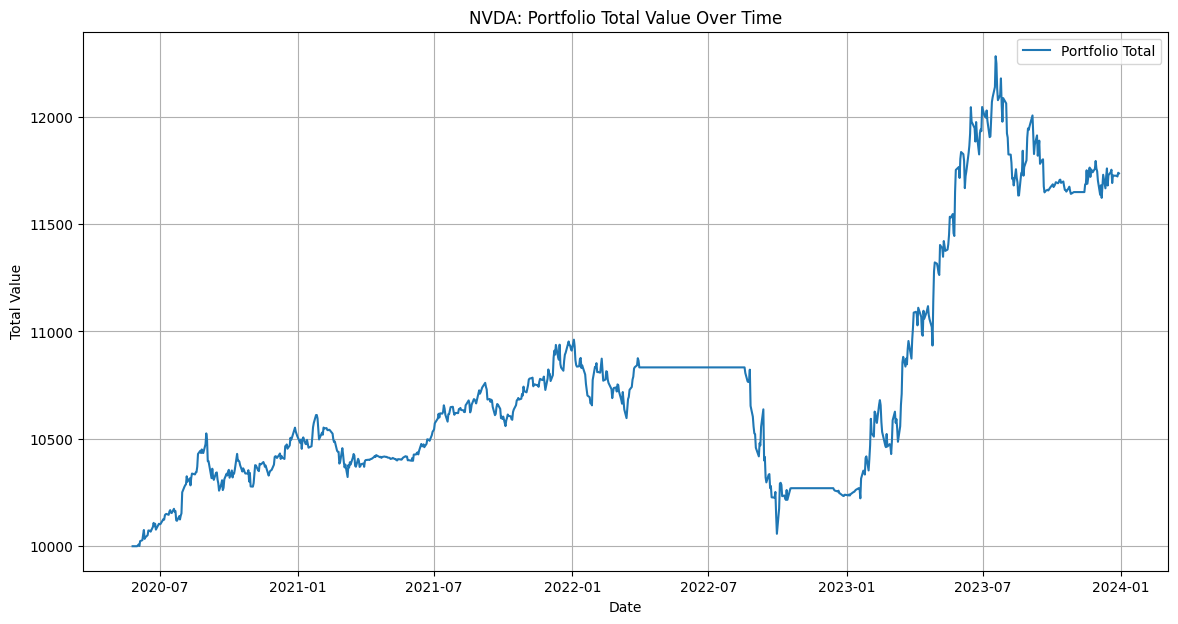

In [35]:
# For now, ignore first value in book.histories - but in future add extra starting date to timeframe

import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(backtest_timeframe, book.nav_history[1:], label="Portfolio Total")
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.title(f'{symbol}: Portfolio Total Value Over Time')
plt.legend()
plt.grid(True)
plt.show()